<a href="https://colab.research.google.com/github/Chaithanyaistharla/Chaithanya_INFO5731_Spring2025/blob/main/Istharla_Chaithanya_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
import re
from collections import Counter


def load_dataset(filename):
    with open(filename, 'r') as file:
        data = file.readlines()
    return [line.strip().lower() for line in data]

def generate_ngrams(text, n):
    words = re.findall(r'\b\w+\b', text)
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def count_ngrams(data, n):
    ngram_counter = Counter()
    for review in data:
        ngrams = generate_ngrams(review, n)
        ngram_counter.update(ngrams)
    return ngram_counter

def calculate_bigram_probabilities(data):
    bigram_counter = count_ngrams(data, 2)
    unigram_counter = count_ngrams(data, 1)

    probabilities = {}
    for bigram, count in bigram_counter.items():
        w1, w2 = bigram.split()
        probabilities[bigram] = count / unigram_counter[w1]
    return probabilities

def extract_noun_phrases(text):
    noun_phrases = re.findall(r'\b[a-z]+\s+[a-z]+\b', text)
    return noun_phrases

def calculate_relative_probabilities(data):
    max_frequency = Counter()
    noun_phrase_frequency = []

    for review in data:
        noun_phrases = extract_noun_phrases(review)
        counter = Counter(noun_phrases)
        noun_phrase_frequency.append(counter)
        max_frequency.update(counter)

    relative_probabilities = []
    max_freq = max(max_frequency.values())

    for counter in noun_phrase_frequency:
        relative_prob = {phrase: freq / max_freq for phrase, freq in counter.items()}
        relative_probabilities.append(relative_prob)

    return relative_probabilities

def main():
    filename = 'final_cleaned_tweets.csv'
    data = load_dataset(filename)
    trigram_counter = count_ngrams(data, 3)
    bigram_counter = count_ngrams(data, 2)
    bigram_probabilities = calculate_bigram_probabilities(data)
    relative_probabilities = calculate_relative_probabilities(data)
    print("Trigram Frequency:")
    print(trigram_counter.most_common(10))
    print("\nBigram Probabilities:")
    for bigram, prob in list(bigram_probabilities.items())[:10]:
        print(f'{bigram}: {prob:.2f}')
    print("\nRelative Probabilities of Noun Phrases:")
    for i, rel_prob in enumerate(relative_probabilities):
        print(f'Review {i+1}: {rel_prob}')

if __name__ == "__main__":
    main()

Trigram Frequency:
[('2025 02 20', 100), ('02 20 04', 56), ('02 20 05', 44), ('20 05 00', 42), ('20 04 59', 26), ('20 04 58', 21), ('00 00 00', 18), ('05 00 00', 13), ('20 04 57', 9), ('01 00 00', 5)]

Bigram Probabilities:
tweet_id created_at: 1.00
created_at user: 1.00
user text: 1.00
1892439292938420494 2025: 1.00
2025 02: 0.93
02 20: 0.99
20 05: 0.44
05 01: 0.04
01 01: 0.29
01 00: 0.71

Relative Probabilities of Noun Phrases:
Review 1: {}
Review 2: {'xbox game': 0.5, 'pas best': 0.25, 'game play': 0.25, 'pas wide': 0.25, 'range game': 0.25, 'offer player': 0.25, 'xboxgames xboxgamepass': 0.25, 'bestxboxgamepassgames gamingnews': 0.25, 'ai ainews': 0.25, 'analyticsinsight analyticsinsightmagazine': 0.25}
Review 3: {'ive started': 0.25, 'earning byte': 0.5, 'world first': 0.25, 'decentralized network': 0.25, 'internet speed': 0.25, 'verification set': 0.25, 'despeed validator': 0.25, 'today start': 0.25, 'kickstart journey': 0.25, 'depin extension': 0.25}
Review 4: {'tweet china': 0.

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [11]:
import re
import math

def load_dataset(filename):
    with open(filename, 'r') as file:
        data = file.readlines()
    return [line.strip().lower() for line in data]

def tokenize(text):
    return re.findall(r'\b\w+\b', text)

def calculate_tf(doc):
    words = tokenize(doc)
    tf = {}
    for word in words:
        tf[word] = tf.get(word, 0) + 1
    for word in tf:
        tf[word] /= len(words)
    return tf

def calculate_idf(data):
    total_docs = len(data)
    idf = {}
    all_words = set()
    for doc in data:
        words = set(tokenize(doc))
        all_words.update(words)
    for word in all_words:
        doc_count = sum(1 for doc in data if word in tokenize(doc))
        idf[word] = math.log(total_docs / (1 + doc_count))
    return idf

def build_tfidf_matrix(data):
    idf = calculate_idf(data)
    tfidf_matrix = []
    for doc in data:
        tf = calculate_tf(doc)
        tfidf = {word: tf[word] * idf[word] for word in tf}
        tfidf_matrix.append(tfidf)
    return tfidf_matrix

def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum(vec1[word] * vec2[word] for word in intersection)
    sum1 = sum(v**2 for v in vec1.values())
    sum2 = sum(v**2 for v in vec2.values())
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    return numerator / denominator

def process_query(query, idf):
    tf = calculate_tf(query)
    tfidf = {word: tf[word] * idf.get(word, 0) for word in tf}
    return tfidf

def rank_documents(tfidf_matrix, query_vector):
    scores = []
    for i, doc_vector in enumerate(tfidf_matrix):
        score = cosine_similarity(doc_vector, query_vector)
        scores.append((i+1, score))
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores

def main():
    filename = 'final_cleaned_tweets.csv'
    data = load_dataset(filename)
    tfidf_matrix = build_tfidf_matrix(data)
    query = "The new Xbox Series X is amazing! Can't wait to try the new games #Xbox #Gaming"
    idf = calculate_idf(data)
    query_vector = process_query(query, idf)
    ranked_docs = rank_documents(tfidf_matrix, query_vector)
    print("Document Rankings Based on Query:")
    for doc_id, score in ranked_docs[:10]:
        print(f'Document {doc_id}: Score = {score:.4f}')

if __name__ == "__main__":
    main()


Document Rankings Based on Query:
Document 10: Score = 0.1935
Document 36: Score = 0.1431
Document 45: Score = 0.1395
Document 44: Score = 0.1282
Document 38: Score = 0.1254
Document 8: Score = 0.1226
Document 1: Score = 0.0000
Document 2: Score = 0.0000
Document 3: Score = 0.0000
Document 4: Score = 0.0000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

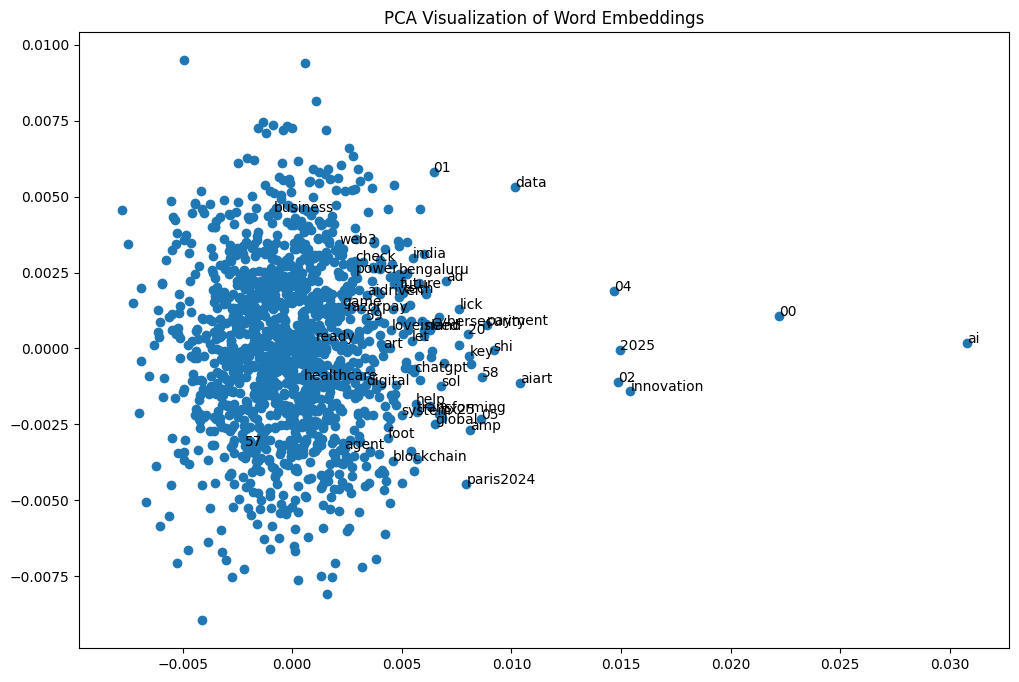

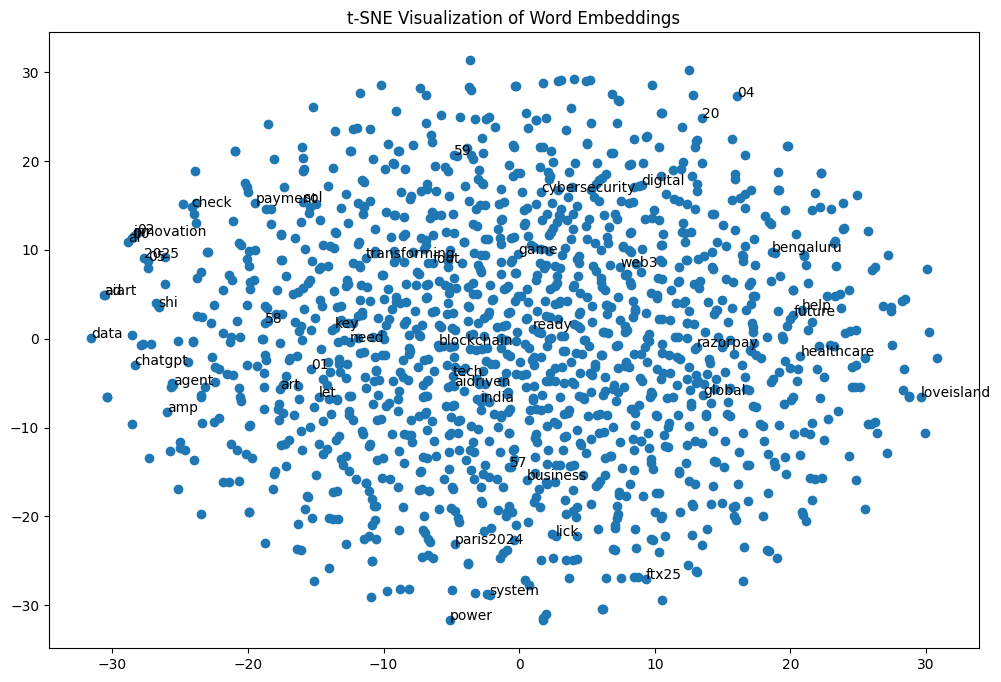

One or both words "tweet" or "post" not in vocabulary
One or both words "follow" or "subscribe" not in vocabulary
One or both words "hashtag" or "trend" not in vocabulary
One or both words "DM" or "chat" not in vocabulary


In [12]:
import re
import math
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

def load_dataset(filename):
    with open(filename, 'r') as file:
        data = file.readlines()
    return [line.strip().lower() for line in data]

def tokenize(text):
    return re.findall(r'\b\w+\b', text)

def train_word2vec(data):
    tokenized_data = [tokenize(doc) for doc in data]
    model = gensim.models.Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1, workers=4)
    return model

def visualize_pca(model):
    words = list(model.wv.index_to_key)
    X = np.array([model.wv[word] for word in words])
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words[:50]):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('PCA Visualization of Word Embeddings')
    plt.show()

def visualize_tsne(model):
    words = list(model.wv.index_to_key)
    X = np.array([model.wv[word] for word in words])
    tsne = TSNE(n_components=2, random_state=42)
    result = tsne.fit_transform(X)
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words[:50]):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title('t-SNE Visualization of Word Embeddings')
    plt.show()

def calculate_similarity(model, word_pairs):
    for w1, w2 in word_pairs:
        if w1 in model.wv and w2 in model.wv:
            similarity = cosine_similarity([model.wv[w1]], [model.wv[w2]])[0][0]
            print(f'Similarity between "{w1}" and "{w2}": {similarity:.4f}')
        else:
            print(f'One or both words "{w1}" or "{w2}" not in vocabulary')

def main():
    filename = 'final_cleaned_tweets.csv'
    data = load_dataset(filename)
    model = train_word2vec(data)
    visualize_pca(model)
    visualize_tsne(model)
    word_pairs = [("tweet", "post"), ("follow", "subscribe"), ("hashtag", "trend"), ("DM", "chat")]
    calculate_similarity(model, word_pairs)

if __name__ == "__main__":
    main()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [10]:
# The GitHub link of your final csv file


# Link: https://github.com/Chaithanyaistharla/Chaithanya_INFO5731_Spring2025/blob/main/sentiment_annotation_tweets.csv

#1. I would like to perform Sentiment Analysis on my dataset.
"""
2. Positive - 'love', 'new update', 'amazing'
      Negative - 'crashing', 'frustating', 'not working'
      Neutral - 'will happen', 'ok', 'not bad'
"""


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The guidance of TA is good, showing demo in class helped me to do this assignment to do a bit faster. The time provided to complete the assignemt is decent.